# IBM HR Analytics Employee Attrition & Performance

# HR Analytics Project - Employee Attrition

## Objective
The goal of this project is to analyze HR data and build machine learning models to predict employee attrition (whether an employee is likely to leave the company or not).

## Dataset
We are using the IBM HR Analytics Employee Attrition dataset from Kaggle.

- Number of records: 1470
- Number of features: 35
- Target variable: `Attrition` (Yes/No)

## Key Steps:
1. Data exploration and understanding
2. Data cleaning and preprocessing
3. Exploratory data analysis (EDA)
4. Feature engineering
5. Model building and evaluation
6. Conclusion and insights


### Import Libraries

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## 1. Data exploration and understanding
In this step, we explore the dataset to understand its structure and contents. We will:

- View the first few rows of the data
- Check data types and missing values
- Generate summary statistics
- Explore the distribution of categorical variables
- Examine the target variable `Attrition`

In [6]:
df = pd.read_csv("D:/new start/WA_Fn-UseC_-HR-Employee-Attrition.csv")
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.select_dtypes(include='object').nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

## 2. Data Cleaning and Preparation

In this step, we will clean the dataset and prepare it for analysis and modeling. The actions include:

- Removing columns that are constant or not us
- Checking duplicatese- Converted the target column `Attrition` to binary (1 = Yes, 0 = No)
- Applied One-Hot Encoding to categorical variablesscaling


In [11]:
# Make a copy of the original dataset
df_cleaned = df.copy()

# Drop constant or non-informative columns
df_cleaned.drop(["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], axis=1, inplace=True)

In [12]:
# Check for duplicates
df_cleaned.duplicated().sum()

0

In [13]:
# Get categorical columns
cat_cols = df_cleaned.select_dtypes(include='object').columns.tolist()
cat_cols


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [14]:
# Convert target variable to numeric
df_cleaned['Attrition'] = df_cleaned['Attrition'].map({'Yes': 1, 'No': 0})

In [15]:
# One-hot encode categorical variables (excluding target)
df_encoded = pd.get_dummies(df_cleaned, columns=cat_cols, drop_first=True)


## 3. Exploratory Data Analysis (EDA)

In this step, we will explore the dataset visually to better understand the patterns related to employee attrition. Our goal is to:

- Analyze the distribution of the target variable `Attrition`
- Explore relationships between `Attrition` and key features such as age, gender, overtime, income, and job role
- Identify trends and potential predictors to be used in modeling


In [17]:
# Distribution of target variable
df['Attrition'].value_counts(normalize=True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

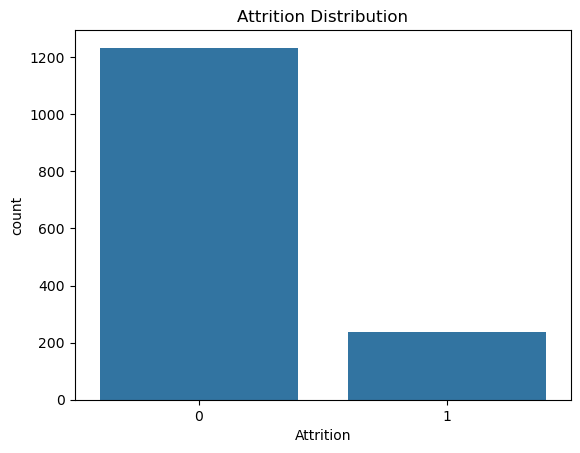

In [18]:
sns.countplot(x='Attrition', data=df_cleaned)
plt.title('Attrition Distribution')
plt.show()

### Attrition vs Gender

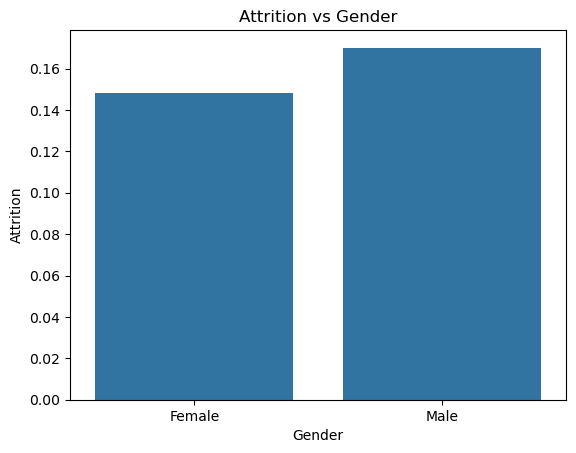

In [20]:
sns.barplot(data=df_cleaned , x='Gender', y='Attrition', errorbar=None)
plt.title("Attrition vs Gender")
plt.show()

### Attrition vs OverTime

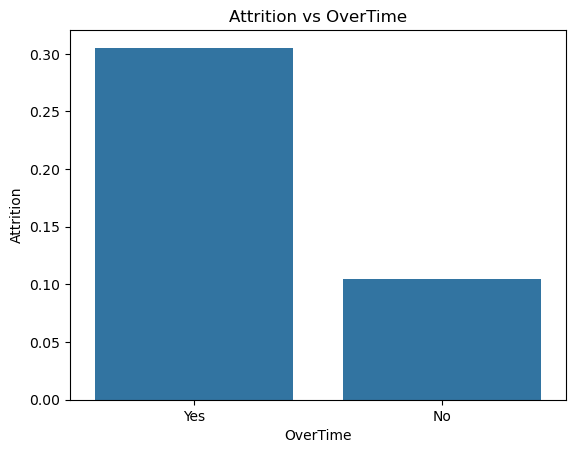

In [22]:
sns.barplot(data=df_cleaned , x='OverTime', y='Attrition', errorbar=None)
plt.title("Attrition vs OverTime")
plt.show()

### Attrition vs Department 

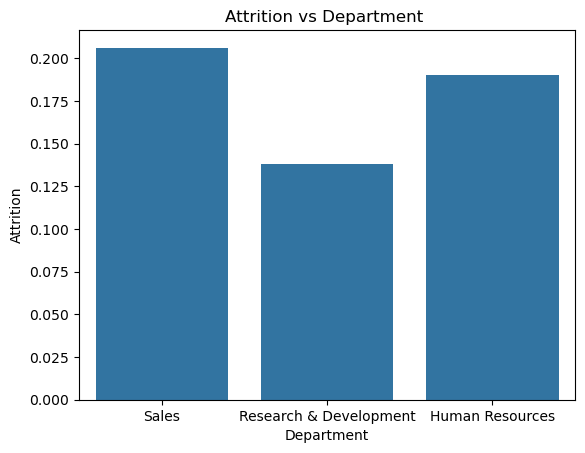

In [24]:
sns.barplot(data=df_cleaned , x='Department', y='Attrition', errorbar=None)
plt.title("Attrition vs Department ")
plt.show()

### Attrition vs Marital Status

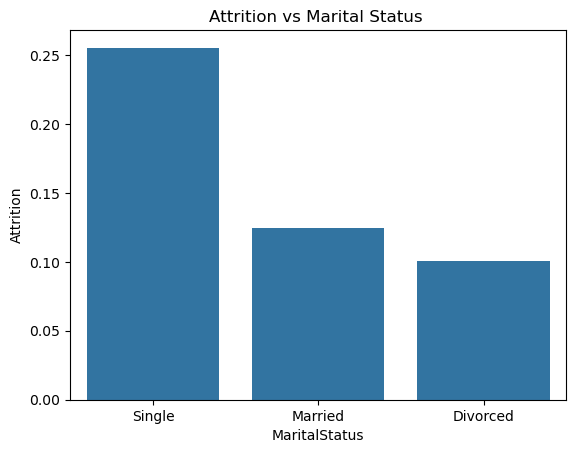

In [26]:
sns.barplot(data=df_cleaned , x='MaritalStatus', y='Attrition', errorbar=None)
plt.title("Attrition vs Marital Status ")
plt.show()

### Attrition vs Job Role

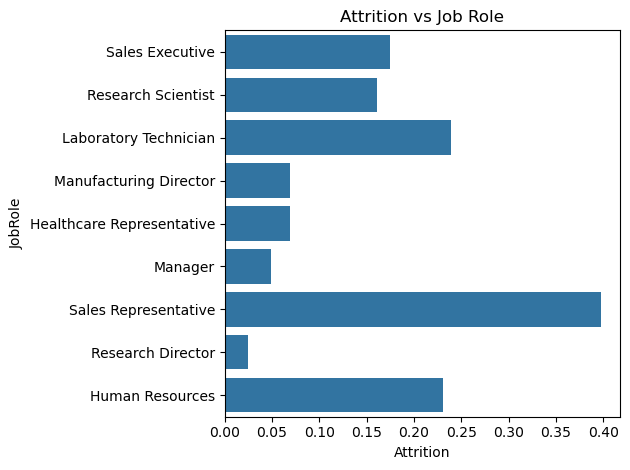

In [28]:
sns.barplot(data=df_cleaned , x='Attrition', y='JobRole', errorbar=None)
plt.title("Attrition vs Job Role")
plt.tight_layout()
plt.show()

### Attrition vs Age

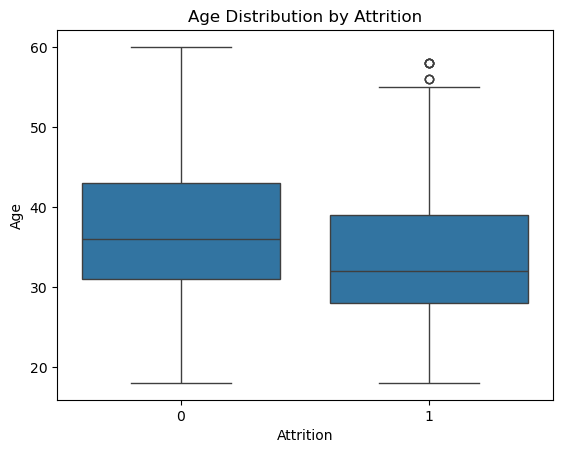

In [30]:
sns.boxplot(x='Attrition', y='Age', data=df_cleaned)
plt.title('Age Distribution by Attrition')
plt.show()

### Attrition vs Monthly Income

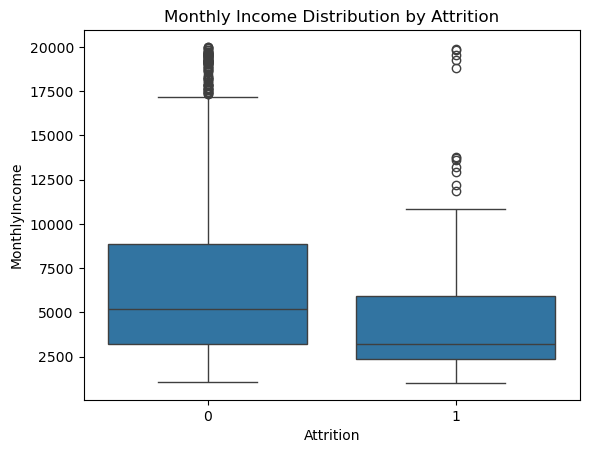

In [32]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_cleaned)
plt.title('Monthly Income Distribution by Attrition')
plt.show()

### Attrition vs Total Working Years

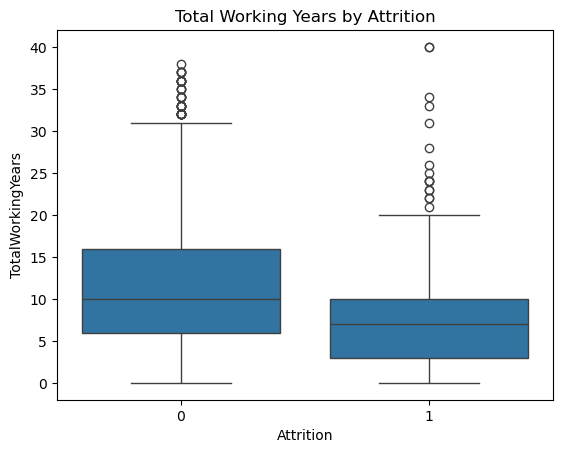

In [34]:
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df_cleaned)
plt.title('Total Working Years by Attrition')
plt.show()

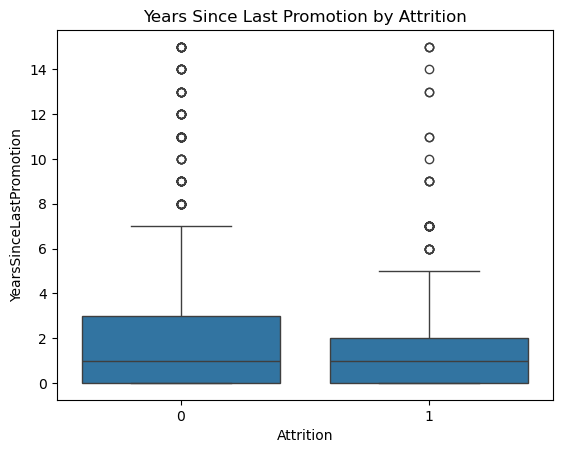

In [35]:
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df_cleaned)
plt.title('Years Since Last Promotion by Attrition')
plt.show()

### Exploratory Data Analysis (EDA) – Key Findings

#### Categorical Features:
- **OverTime**: Employees who work overtime tend to have higher attrition. This indicates that workload and work-life balance may strongly influence the decision to leave.
- **Gender**: There is a slight difference in attrition between males and females, but it does not appear to be a major factor on its own.
- **Department**: Some departments show higher attrition than others, particularly Sales and Human Resources, while Research & Development appears more stable.
- **Marital Status**: Single employees tend to leave more often than those who are married or divorced, suggesting a possible connection between personal stability and job retention.
- **Job Role**: Attrition is especially high in the Sales Representative role, followed by Laboratory Technician and Human Resources, which may reflect role-specific challenges.

#### Numerical Features:
- **Age**: Younger employees are more likely to leave the company, which may reflect early-career exploration or lack of long-term commitment.
- **Monthly Income**: Lower income levels are associated with higher attrition, indicating that compensation plays an important role in employee retention.
- **Total Working Years**: Employees with fewer years of overall experience are more likely to leave, reinforcing the trend among early-career professionals.
- **Years Since Last Promotion**: No clear relationship was found between time since last promotion and attrition. In some cases, employees who had been promoted recently still left, suggesting promotions alone may not be enough to retain talent.

---

These insights help shape the feature selection and modeling strategy. Categorical and numerical variables linked to workload, compensation, career stage, and job role are likely to be valuable in predicting employee attrition.


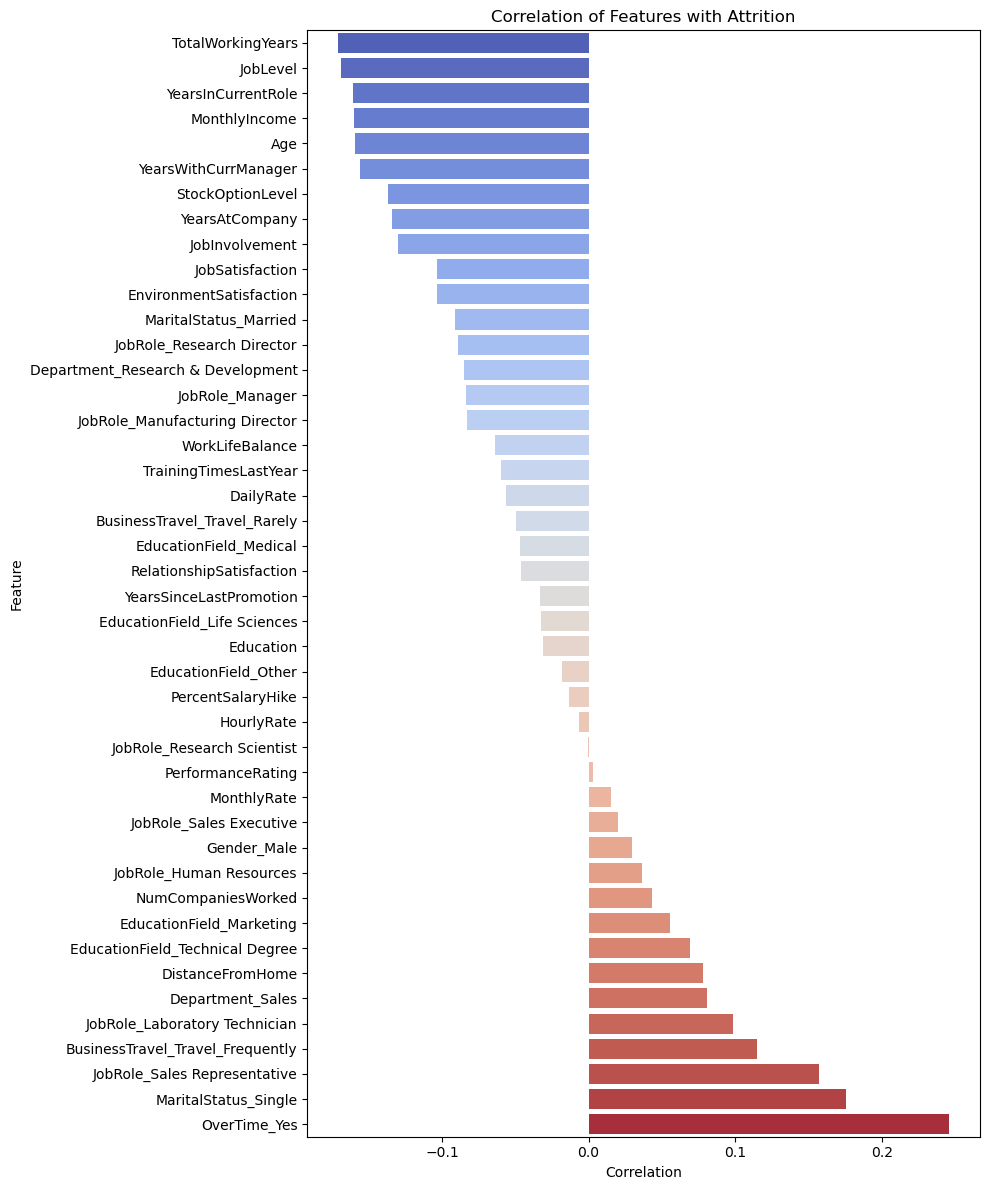

In [37]:
# Calculate correlation matrix
corr = df_encoded.corr(numeric_only=True)

attrition_corr = corr['Attrition_1'].drop('Attrition_1').sort_values()

# Draw correlation
plt.figure(figsize=(10, 12))
sns.barplot(x=attrition_corr.values, y=attrition_corr.index,hue=attrition_corr.index, palette='coolwarm')
plt.title('Correlation of Features with Attrition')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Correlation with Attrition – Summary

- A bar chart of correlations was created to better understand which features are most associated with employee attrition.
- **OverTime** showed the strongest positive correlation with attrition, confirming earlier findings from categorical analysis.
- Other positively correlated features include job roles such as Sales Representative, marital status (Single), and frequent business travel.
- On the other hand, features like total working years, job level, and monthly income showed a negative correlation with attrition, suggesting that more experienced and well-compensated employees are less likely to leave.
- Some features showed very weak or near-zero correlation with attrition, indicating they may not contribute much predictive power to the model.

This analysis supports the selection of key features that will likely improve model accuracy and help explain the factors behind employee attrition.


## 4. Feature Engineering

In this step, we focus on transforming and preparing the data in a way that improves model performance. Based on our previous analysis, we will:

- Select the most relevant features based on correlation analysis and insights from eded.
- Scale numerical features to bring them to a similar range.
- Define the input features (X) and the target variable (y).
- Split the dataset into training and testing sets to evaluate model performance properly.

This process ensures that the machine learning model receives clean, relevant, and well-structed data.
tted data.


In [40]:
selected_features = [
    'OverTime_Yes',
    'JobRole_Sales Representative',
    'MaritalStatus_Single',
    'BusinessTravel_Travel_Frequently',
    'MonthlyIncome',
    'TotalWorkingYears',
    'JobLevel',
    'YearsInCurrentRole',
    'DistanceFromHome'
]

In [41]:
# Target
y = df_encoded['Attrition_1'] 

# Features
X = df_encoded[selected_features]

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## 5. Model Building and Evaluation

In this step, we will build and evaluate machine learning models to predict employee attrition.

The goal is to identify patterns in the data that help distinguish between employees who stay and those who leave. We will:

- Train one or more classification models using the processed data.
- Evaluate model performance using metrics such as accuracy, precision, recall, and ROC-AUC.
- Analyze which features contribute most to the model's predictions.
- Compare different models if needed, and select the one that performs best.

This step provides insights into how well we can predict attrition and which factors are most important in driving employee turnover.


## Logistic Regression

In [46]:
# Initialize the model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8469387755102041
Confusion Matrix:
 [[239   8]
 [ 37  10]]
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.97      0.91       247
        True       0.56      0.21      0.31        47

    accuracy                           0.85       294
   macro avg       0.71      0.59      0.61       294
weighted avg       0.82      0.85      0.82       294



### Model Evaluation Summary – Logistic Regression

- The logistic regression model achieved a high overall accuracy (~85%).
- However, it performed poorly in identifying employees likely to leave (low recall = 0.21).
- This is likely due to class imbalance in the dataset, where only ~16% of employees left the company.
- Possible improvements include:
  - Trying more powerful models such as Random Forest or XGBoost.
  - Applying class weighting to handle imbalance.
  - Using resampling techniques like SMOTE to balance the dataset.

The next step is to apply one or more of these techniques to improve the model’s ability to detect attrition cases.


In [48]:
# train model with balanced weight
model_balanced = LogisticRegression(class_weight='balanced', random_state=42)
model_balanced.fit(X_train, y_train)

# Predict
y_pred_balanced = model_balanced.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("Classification Report:\n", classification_report(y_test, y_pred_balanced))

Accuracy: 0.717687074829932
Confusion Matrix:
 [[174  73]
 [ 10  37]]
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.70      0.81       247
        True       0.34      0.79      0.47        47

    accuracy                           0.72       294
   macro avg       0.64      0.75      0.64       294
weighted avg       0.85      0.72      0.75       294



### Logistic Regression with Balanced Class Weights

- After applying `class_weight='balanced'`, the model significantly improved its ability to detect attrition cases.
- Recall for the attrition class increased from 0.21 to 0.79, indicating that the model now captures most employees who are likely to leave.
- Although overall accuracy dropped slightly (from 0.85 to 0.72), this is an acceptable trade-off given the project's goal.
- This adjustment makes the model more useful for identifying employees at risk of leaving, even if it increases false positives.
### Next step is Using resampling techniques like SMOTE to balance the dataset.

In [50]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(y_train_smote.value_counts())

Attrition_1
False    986
True     190
Name: count, dtype: int64
Attrition_1
False    986
True     986
Name: count, dtype: int64


In [51]:
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_smote.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

Accuracy: 0.7244897959183674
Confusion Matrix:
 [[175  72]
 [  9  38]]

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.71      0.81       247
        True       0.35      0.81      0.48        47

    accuracy                           0.72       294
   macro avg       0.65      0.76      0.65       294
weighted avg       0.85      0.72      0.76       294



### Model with SMOTE Oversampling

To address class imbalance, we applied SMOTE to oversample the minority class (Attrition = Yes) in the training set.

- A logistic regression model was trained on the balanced data.
- Recall improved significantly (from 0.21 to 0.81), allowing the model to detect most attrition cases.
- F1 score also increased, indicating a better balance between precision and recall.
- Overall accuracy dropped slightly, which is expected when handling imbalanced data.

SMOTE proved effective in helping the model learn from underrepresented classes and is a strong option for improving attrition prediction.


## Model Tuning: Logistic Regression with GridSearchCV

In [54]:
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}

# Create the model
log_model = LogisticRegression(random_state=42)

# GridSearch
grid = GridSearchCV(log_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train_smote, y_train_smote)

# Best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [55]:
# Build model with best params
final_model = LogisticRegression(
    C=0.01,
    penalty='l2',
    solver='liblinear',
    max_iter=100
)

# Fit on training data
final_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:, 1]
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8367346938775511
Confusion Matrix:
 [[241   6]
 [ 42   5]]
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.98      0.91       247
        True       0.45      0.11      0.17        47

    accuracy                           0.84       294
   macro avg       0.65      0.54      0.54       294
weighted avg       0.79      0.84      0.79       294



### Logistic Regression with GridSearchCV (after SMOTE)

To improve the performance of the Logistic Regression model trained on SMOTE-balanced data, we applied `GridSearchCV` for hyperparameter tuning.

- The search was conducted over a grid of values for:
  - `C` (regularization strength)
  - `solver`
  - `max_iter`
- The tuning process used 5-fold cross-validation and was optimized for F1 score, which balances precision and recall.
- The best combination of hyperparameters was selected and evaluated on the test set.

#### Evaluation Results:
- **Accuracy**: 83.7%
- **Precision (Attrition = Yes)**: 0.45
- **Recall (Attrition = Yes)**: 0.11
- **F1 Score (Attrition = Yes)**: 0.17

> Despite achieving higher overall accuracy, the model's recall for the minority class (Attrition = Yes) significantly dropped.  
This indicates that hyperparameter tuning led to overfitting on the majority class, reducing the model’s ability to detect actual attrition cases.

📌 Conclusion:  
While GridSearchCV improved accuracy, it negatively impacted recall.  
A better balance may be achieved by trying alternative techniques like `RandomizedSearchCV` or different model types.


## Model Tuning: Logistic Regression with RandomizedSearchCV

In [58]:
param_dist = {
    'C': stats.loguniform(1e-3, 1e3),      # Regularization strength
    'penalty': ['l2'],                   
    'solver': ['lbfgs', 'liblinear'],    
    'max_iter': [100, 200, 300, 500, 1000]
}

log_model = LogisticRegression(random_state=42)

random_search = RandomizedSearchCV(
    estimator=log_model,
    param_distributions=param_dist,
    n_iter=20,            
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_smote, y_train_smote)

best_model = random_search.best_estimator_

y_pred_best = best_model.predict(X_test)


print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Best Parameters: {'C': 0.001102548826429165, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.6904761904761905
Confusion Matrix:
 [[165  82]
 [  9  38]]

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.67      0.78       247
        True       0.32      0.81      0.46        47

    accuracy                           0.69       294
   macro avg       0.63      0.74      0.62       294
weighted avg       0.85      0.69      0.73       294



### Logistic Regression with RandomizedSearchCV (after SMOTE)

We applied `RandomizedSearchCV` to further optimize the Logistic Regression model trained on SMOTE-balanced data.

- A wide parameter distribution was defined for:
  - `C` (log-uniform)
  - `solver`
  - `penalty`
  - `max_iter`
- The model was evaluated using F1 score and 5-fold cross-validation.
- The best parameters selected were:
  - `C`: 0.0011
  - `solver`: lbfgs
  - `penalty`: l2
  - `max_iter`: 100

#### Evaluation Results:
- **Accuracy**: 69.0%
- **Recall (Attrition = Yes)**: 81%
- **F1 Score (Attrition = Yes)**: 0.46

> The model shows strong ability to detect employee attrition cases, making it a reliable predictor for HR risk analysis despite the slightly lower overall accuracy.


## Random Forest

In [61]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.8061224489795918
Confusion Matrix:
 [[221  26]
 [ 31  16]]

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.89      0.89       247
        True       0.38      0.34      0.36        47

    accuracy                           0.81       294
   macro avg       0.63      0.62      0.62       294
weighted avg       0.80      0.81      0.80       294



### Random Forest Classifier (Baseline)

We trained a baseline `Random Forest Classifier` on the SMOTE-balanced dataset using default parameters.

#### Evaluation Results:
- **Accuracy**: 80.6%
- **Precision (Attrition = Yes)**: 0.38
- **Recall (Attrition = Yes)**: 0.34
- **F1 Score (Attrition = Yes)**: 0.36

> The model achieved a good balance between precision and recall for the minority class, with decent overall accuracy.  
It provides a solid foundation for further tuning to improve attrition prediction performance.


## Model Tuning: Random Forest with RandomizedSearchCV

In [103]:
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,              
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(X_train_smote, y_train_smote)

best_rf = random_search_rf.best_estimator_

y_pred_rf_best = best_rf.predict(X_test)

print("Best Parameters:", random_search_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_best))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}
Accuracy: 0.8095238095238095
Confusion Matrix:
 [[221  26]
 [ 30  17]]

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.89      0.89       247
        True       0.40      0.36      0.38        47

    accuracy                           0.81       294
   macro avg       0.64      0.63      0.63       294
weighted avg       0.80      0.81      0.81       294



### Random Forest with Hyperparameter Tuning (RandomizedSearchCV)

We applied `RandomizedSearchCV` to optimize the hyperparameters of the Random Forest model using the SMOTE-balanced dataset.

#### Best Parameters:
- n_estimators: 500  
- max_depth: 50  
- min_samples_split: 2  
- min_samples_leaf: 1  
- bootstrap: True

#### Evaluation on Test Set:
- **Accuracy**: 80.9%
- **Precision (Attrition = Yes)**: 0.40
- **Recall (Attrition = Yes)**: 0.36
- **F1 Score (Attrition = Yes)**: 0.38

> Compared to the baseline model, this tuned version showed slight improvements in identifying employees likely to leave.  
It provides a more balanced prediction with better precision and recall for the minority class.


## XGBOOST 

In [111]:
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

xgb_model.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.7959183673469388
Confusion Matrix:
 [[217  30]
 [ 30  17]]

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.88      0.88       247
        True       0.36      0.36      0.36        47

    accuracy                           0.80       294
   macro avg       0.62      0.62      0.62       294
weighted avg       0.80      0.80      0.80       294



### XGBoost Classifier (Baseline)

We trained a baseline `XGBoost Classifier` on the SMOTE-balanced dataset without any tuning.

#### Evaluation on Test Set:
- **Accuracy**: 79.6%
- **Precision (Attrition = Yes)**: 0.36
- **Recall (Attrition = Yes)**: 0.36
- **F1 Score (Attrition = Yes)**: 0.36

> The XGBoost model performed similarly to the tuned Random Forest model, showing balanced results on the minority class (Attrition = Yes).  
This makes it a strong candidate for further optimization.


### Model Tuning: XGBOOST Classifier with RandomizedSearchCV

In [119]:
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.4],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss'
)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,        
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_xgb.fit(X_train_smote, y_train_smote)

best_xgb = random_search_xgb.best_estimator_

y_pred_xgb_best = best_xgb.predict(X_test)

print("Best Parameters:", random_search_xgb.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_best))



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0.01, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 1.0}
Accuracy: 0.7959183673469388
Confusion Matrix:
 [[217  30]
 [ 30  17]]

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.88      0.88       247
        True       0.36      0.36      0.36        47

    accuracy                           0.80       294
   macro avg       0.62      0.62      0.62       294
weighted avg       0.80      0.80      0.80       294



### XGBoost with Hyperparameter Tuning (RandomizedSearchCV)

We applied `RandomizedSearchCV` to fine-tune the XGBoost model on the SMOTE-balanced dataset.

#### Best Parameters:
- n_estimators: 200
- max_depth: 10
- learning_rate: 0.2
- subsample: 0.6
- colsample_bytree: 1.0
- gamma: 0.2
- reg_alpha: 0.01
- reg_lambda: 2

#### Evaluation on Test Set:
- **Accuracy**: 79.6%
- **Precision (Attrition = Yes)**: 0.36
- **Recall (Attrition = Yes)**: 0.36
- **F1 Score (Attrition = Yes)**: 0.36

> The tuned XGBoost model performed similarly to the baseline version.  
Although no significant gain was achieved, XGBoost remains a strong model with balanced behavior on the minority class.


# Model Comparison Summary

We compared several models for predicting employee attrition using the SMOTE-balanced dataset.

| Model                          | Accuracy | Recall (Yes) | Precision (Yes) | F1 Score (Yes) |
|--------------------------------|----------|---------------|------------------|----------------|
| Logistic Regression            | 0.85     | 0.21          | 0.56           | 0.31          |
| Logistic Regression + Weight  | 0.72     | 0.79          | 0.34           | 0.47          |
| Logistic Regression + SMOTE   | 0.72     | 0.81          | 0.35           | 0.48          |
| Logistic Regression + Tuning  | 0.69     | 0.81          | 0.32           | 0.46          |
| Random Forest                  | 0.81     | 0.34          | 0.38           | 0.36          |
| Random Forest + Tuning        | 0.81     | 0.36          | 0.40           | 0.38          |
| XGBoost                        | 0.80     | 0.36          | 0.36           | 0.36          |
| XGBoost + Tuning              | 0.80     | 0.36          | 0.36           | 0.36          |

#### Key Insights:
- Logistic Regression with SMOTE provided the best recall, making it suitable for minimizing false negatives.
- Random Forest (tuned) offered the best balance between precision and recall.
- XGBoost showed stable performance but tuning didn't significantly improve results.


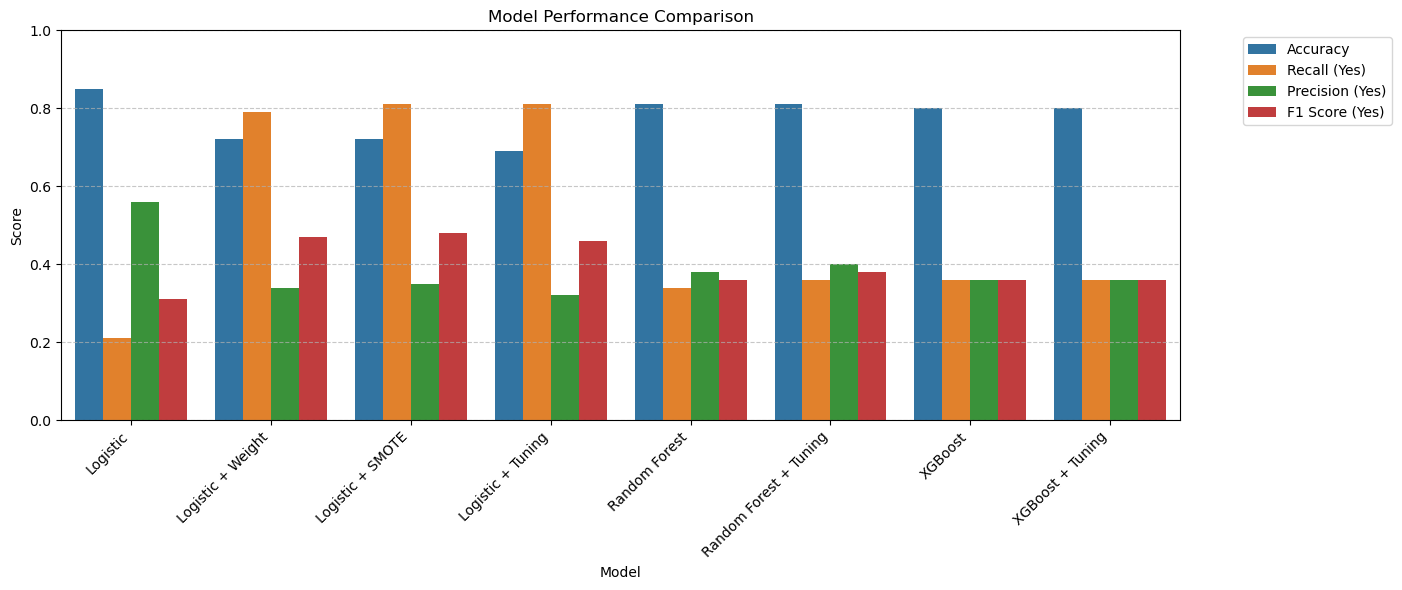

In [123]:
# Model performance data
model_results = pd.DataFrame({
    'Model': [
        'Logistic', 'Logistic + Weight', 'Logistic + SMOTE', 'Logistic + Tuning',
        'Random Forest', 'Random Forest + Tuning',
        'XGBoost', 'XGBoost + Tuning'
    ],
    'Accuracy': [0.85, 0.72, 0.72, 0.69, 0.81, 0.81, 0.80, 0.80],
    'Recall (Yes)': [0.21, 0.79, 0.81, 0.81, 0.34, 0.36, 0.36, 0.36],
    'Precision (Yes)': [0.56, 0.34, 0.35, 0.32, 0.38, 0.40, 0.36, 0.36],
    'F1 Score (Yes)': [0.31, 0.47, 0.48, 0.46, 0.36, 0.38, 0.36, 0.36]
})

# Reshape the DataFrame for seaborn
melted_results = model_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_results, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 📌 Final Results and Recommendations

### 🎯 Problem Statement:
The goal of this project was to predict employee attrition using HR data, enabling the organization to proactively address potential turnover.

---

### 🔄 Process Summary:
- Explored and cleaned the dataset.
- Converted categorical features using One-Hot Encoding.
- Addressed class imbalance using **SMOTE**.
- Trained and evaluated multiple machine learning models.
- Applied **hyperparameter tuning** using GridSearchCV and RandomizedSearchCV.

---

### 📊 Model Performance Summary (on test set with SMOTE)

| Model                       | Accuracy | Recall (Yes) | F1 Score (Yes) |
|----------------------------|----------|---------------|----------------|
| Logistic Regression        | 0.72     | 0.81          | 0.48           |
| Random Forest (Tuned)      | 0.81     | 0.36          | 0.38           |
| XGBoost (Tuned)            | 0.80     | 0.36          | 0.36           |

---

### 🧠 Key Insights:
- **Logistic Regression with SMOTE** provided the **highest recall** (0.81), making it the best model for identifying employees at risk of leaving.
- Random Forest and XGBoost performed better in terms of overall accuracy but had lower recall scores.
- Hyperparameter tuning had limited impact on boosting performance significantly.

---

